In [1]:
import torch
import torchvision
from torchvision import transforms ,datasets
import helper
import importlib
importlib.reload(helper)

<module 'helper' from 'C:\\Users\\USER\\Desktop\\pyTorch\\helper.py'>

In [14]:
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm



if torch.cuda.is_available():
    device = torch.device("cuda:0")  # you can continue going on here, like cuda:1 cuda:2....etc. 
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")


class animals():
    path = "data"
    dataset = []
    trainset = []
    transform = transforms.Compose([
#                                  transforms.Grayscale(),
                                transforms.Resize((50,50)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                                   ])
    class Net(nn.Module):
    
        def __init__(self):
            super().__init__()
            # fc = fully connected
            self.conv1 = nn.Conv2d(3,6, 5).cuda()
            self.conv2 = nn.Conv2d(6, 16, 5).cuda()
        
            self.pool = nn.MaxPool2d(2, 2).cuda()
            
            self.fc1 = nn.Linear(16*9*9, 120) .cuda()  # must compute input size first
            self.fc2 = nn.Linear(120, 84).cuda()
            self.fc4 = nn.Linear(84, 2).cuda()
            
        def convs(self,x):
            
            x = self.pool(F.relu(self.conv1(x)))
            x = self.pool(F.relu(self.conv2(x)))
#             x = torch.flatten(x)
            return x

        def forward(self,x):
            # relu = 0 or 1   _/``  <- relu  
            
            x = self.convs(x)
#             print(x.size())   # compute fc1 size here   <-----------------
            x = x.view(-1,16*9*9)
            
            x = F.relu(self.fc1(x))
            x = F.relu(self.fc2(x))
            x = self.fc4(x)
#             return F.sigmoid(x)
#             return F.softmax(x,dim=1)
            return x

    
    def __init__(self):
        self.net = self.Net()
        
    def load(self):
            self.dataset = datasets.ImageFolder(self.path, transform=self.transform)
#             self.dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
#                                                     download=True, transform=self.transform)
            self.trainset = torch.utils.data.DataLoader(self.dataset, 
                                       batch_size=4,
                                       shuffle=True,num_workers=2)
         
           
    def forward(self,epochs=3):
    
    
#         optimizer = optim.Adam(self.net.parameters(),lr=0.001)
#         criterion = nn.BCELoss()
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(self.net.parameters(), lr=0.001, momentum=0.9)
        trainset = self.trainset 
        for epoch in tqdm(range(epochs)):
            for data in trainset:
                
                    # x image data , y = label
                    # in general x = input , y = answer
                    x,y = data
    #                 print(x.size(),y.size())
    #                 print(x.view(-1,50*50).size())
    #                 break
                     
                    self.net.zero_grad() 
#                     print("input:",x.size())
                    x,y = x.to(device),y.to(device)
                    output = self.net.forward(x)
#                     print("output:",output,y)
#                     loss = F.nll_loss(output,y)
                    loss = criterion(output, y)
                    loss.backward()
                    optimizer.step()
              
            print(loss)
            self.predict()
    
        
    
    def predict(self): # test
        correct = 0
        total = 0
        trainset = self.trainset
        co = 0
        with torch.no_grad():
            for data in trainset:
                co+=1
                if(co == 10): 
                    break
                x,y = data
                x,y = x.to(device),y.to(device)
               # print("input",x.size())
                output = self.net.forward(x)
               # print(output,y)
                for idx,i in enumerate(output):
                    if torch.argmax(i) == y[idx]:
                        correct += 1
                    total += 1
        print("Accuracy : ",round(correct/total,3)*100,"%")
        return 0
    
    
    
            
            

Running on the GPU


In [15]:
anm = animals()
anm.load()

In [16]:
anm.forward(epochs=10) 
# torch.save(anm,'anm.pt')

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

tensor(0.5115, device='cuda:0', grad_fn=<NllLossBackward>)


 10%|████████▎                                                                          | 1/10 [01:12<10:55, 72.82s/it]

Accuracy :  58.3 %
tensor(0.3824, device='cuda:0', grad_fn=<NllLossBackward>)


 20%|████████████████▌                                                                  | 2/10 [02:20<09:29, 71.23s/it]

Accuracy :  55.60000000000001 %
tensor(0.3003, device='cuda:0', grad_fn=<NllLossBackward>)


 30%|████████████████████████▉                                                          | 3/10 [03:22<07:59, 68.54s/it]

Accuracy :  77.8 %
tensor(0.6398, device='cuda:0', grad_fn=<NllLossBackward>)


 40%|█████████████████████████████████▏                                                 | 4/10 [04:25<06:40, 66.72s/it]

Accuracy :  77.8 %
tensor(0.2458, device='cuda:0', grad_fn=<NllLossBackward>)


 50%|█████████████████████████████████████████▌                                         | 5/10 [05:30<05:31, 66.27s/it]

Accuracy :  63.9 %
tensor(0.1968, device='cuda:0', grad_fn=<NllLossBackward>)


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [06:42<04:31, 67.91s/it]

Accuracy :  83.3 %
tensor(0.1476, device='cuda:0', grad_fn=<NllLossBackward>)


 70%|██████████████████████████████████████████████████████████                         | 7/10 [07:47<03:21, 67.19s/it]

Accuracy :  86.1 %
tensor(0.3605, device='cuda:0', grad_fn=<NllLossBackward>)


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [08:56<02:15, 67.63s/it]

Accuracy :  91.7 %
tensor(0.0377, device='cuda:0', grad_fn=<NllLossBackward>)


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [10:05<01:08, 68.26s/it]

Accuracy :  94.39999999999999 %
tensor(0.6554, device='cuda:0', grad_fn=<NllLossBackward>)


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [11:18<00:00, 67.82s/it]

Accuracy :  97.2 %


In [17]:
PATH = 'model/animal.pth'
torch.save(anm.net.state_dict(), PATH)

In [18]:
PATH = 'model/animal.pth'
testAnimal = animals()
t = animals()
testAnimal.net.load_state_dict(torch.load(PATH))
classes = ('cat','dog')

In [19]:
t.load()

In [20]:
testset = t.trainset

In [21]:
def predict(x,sampleSize = 100):
    correct = 0
    total = 0
    trainset = x
    co = 0
    net = testAnimal.net
    with torch.no_grad():
        for data in trainset:
            
            if(co == sampleSize): 
                break
            co+=1
            x,y = data
            x,y = x.to(device),y.to(device)
               # print("input",x.size())
            print("---:input:---")
            for img in x:
                helper.imshow(img.to(torch.device("cpu")))
            for lb in y:
                print(classes[lb])
            output = net.forward(x)
            print("---:output:---")
            for idx,i in enumerate(output):
                argmax = torch.argmax(i)
                print(classes[argmax])
                if argmax == y[idx]:
                    correct += 1
                total += 1
    print("Accuracy : ",round(correct/total,3)*100,"%")
    return 0

---:input:---
cat
cat
dog
dog
---:output:---
cat
cat
dog
dog
Accuracy :  100.0 %


0

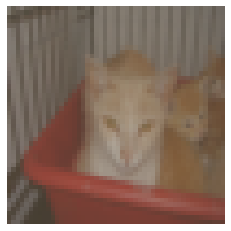

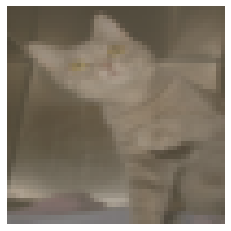

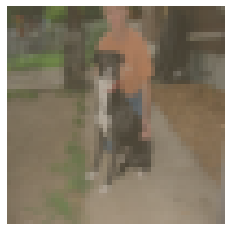

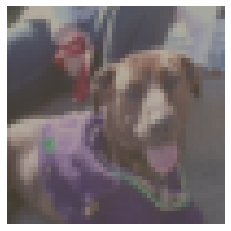

In [22]:
predict(testset,sampleSize = 1)